# Whitening scaler using SVD

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


Bad key "backend in file /Users/masui/.matplotlib/matplotlibrc, line 1 ('"backend : Tkagg"')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def pair_plot(X, y, figsize=(16,15), bins=30):
    color = ['indigo', 'seagreen', 'yellow']
    n_samples, n_features = X.shape
    
    plt.figure(figsize=figsize)
    for i in range(n_features):
        for j in range(n_features):
            plt.subplot(n_features, n_features, i*n_features + j + 1)
            if i == j:
                for k, c in enumerate(np.unique(y)):
                    plt.hist(X[:,i][y == c], bins=bins, color=color[k])
                plt.grid()
            else:
                plt.scatter(X[:,i], X[:,j], c=y)
                plt.grid()
    plt.show()

## Load iris dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X, X_test, y, y_test = train_test_split(X, y, test_size=30, random_state=0)

[[ 0.723243   -0.0222465   1.32938165  0.54607423]
 [-0.0222465   0.18654342 -0.29110364 -0.10909804]
 [ 1.32938165 -0.29110364  3.18588165  1.33991457]
 [ 0.54607423 -0.10909804  1.33991457  0.60117367]]


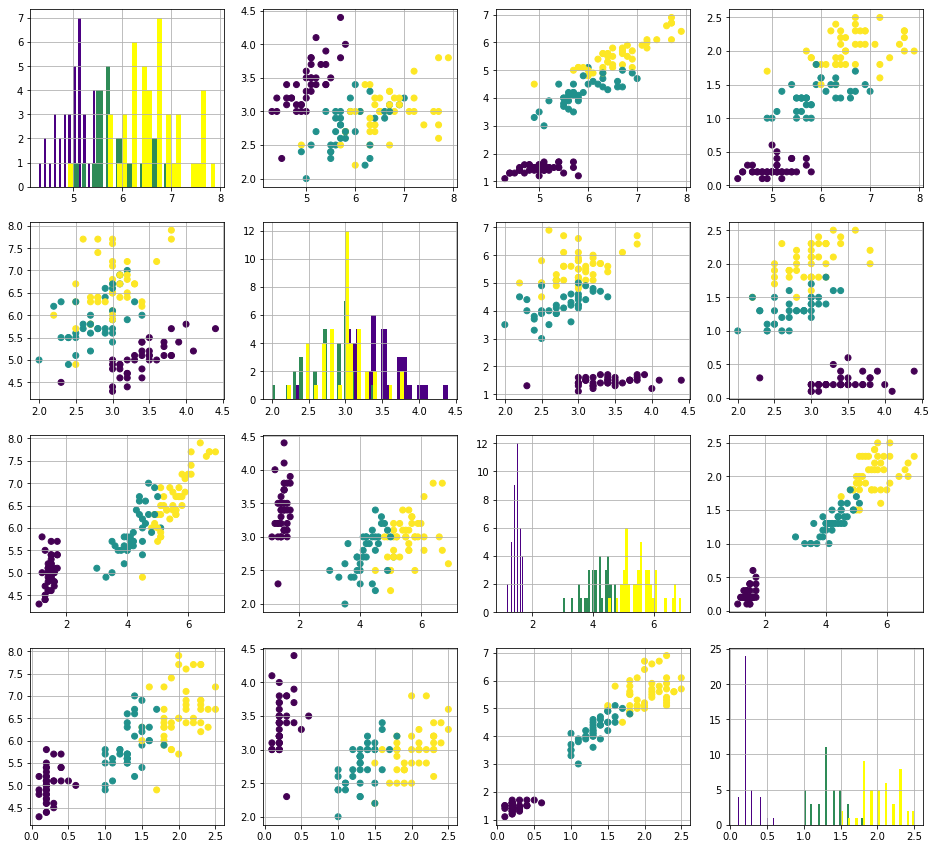

In [4]:
print(np.cov(X.T))
pair_plot(X, y)

## Compare implementations

In [5]:
import sys
sys.path.append('..')

from spmimage.preprocessing.data import WhiteningScaler
from sklearn.decomposition import PCA

## PCA(sklean)

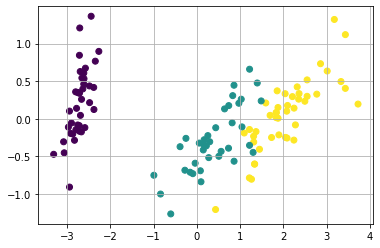

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.grid()
plt.show()

[[ 4.34919785e+00 -1.79167596e-17  7.66796915e-17 -2.14984034e-17]
 [-1.79167596e-17  2.52282986e-01 -2.71990944e-17 -4.07613804e-18]
 [ 7.66796915e-17 -2.71990944e-17  7.35619138e-02 -5.37028688e-18]
 [-2.14984034e-17 -4.07613804e-18 -5.37028688e-18  2.17989889e-02]]


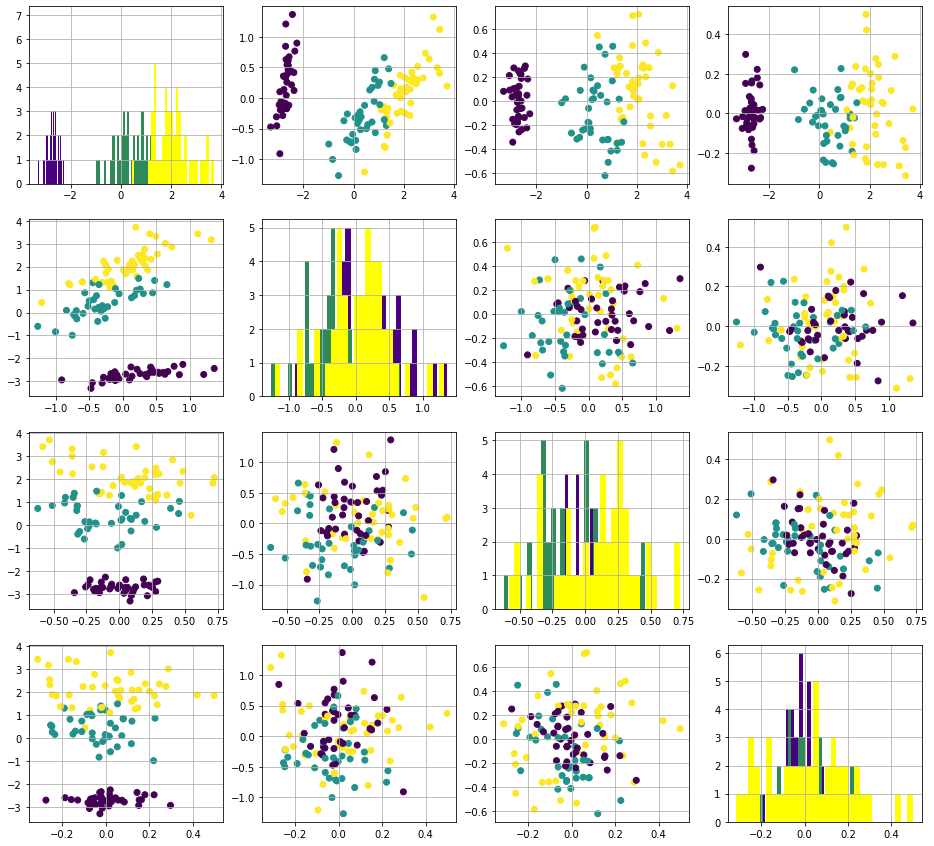

In [7]:
print(np.cov(X_pca.T))
pair_plot(X_pca, y)

## Whitening

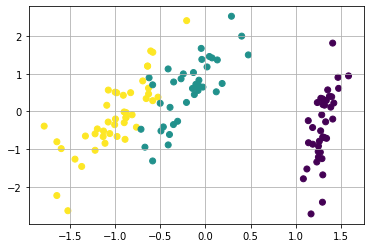

In [8]:
whitening = WhiteningScaler(apply_zca=False)
X_whiten = whitening.fit_transform(X)

plt.figure()
plt.scatter(X_whiten[:,0], X_whiten[:,1], c=y)
plt.grid()
plt.show()

[[ 1.00000000e+00 -8.42281072e-17  1.08756362e-15 -4.92006782e-16]
 [-8.42281072e-17  1.00000000e+00  2.20072402e-16  8.75400051e-16]
 [ 1.08756362e-15  2.20072402e-16  1.00000000e+00  6.12179238e-16]
 [-4.92006782e-16  8.75400051e-16  6.12179238e-16  1.00000000e+00]]


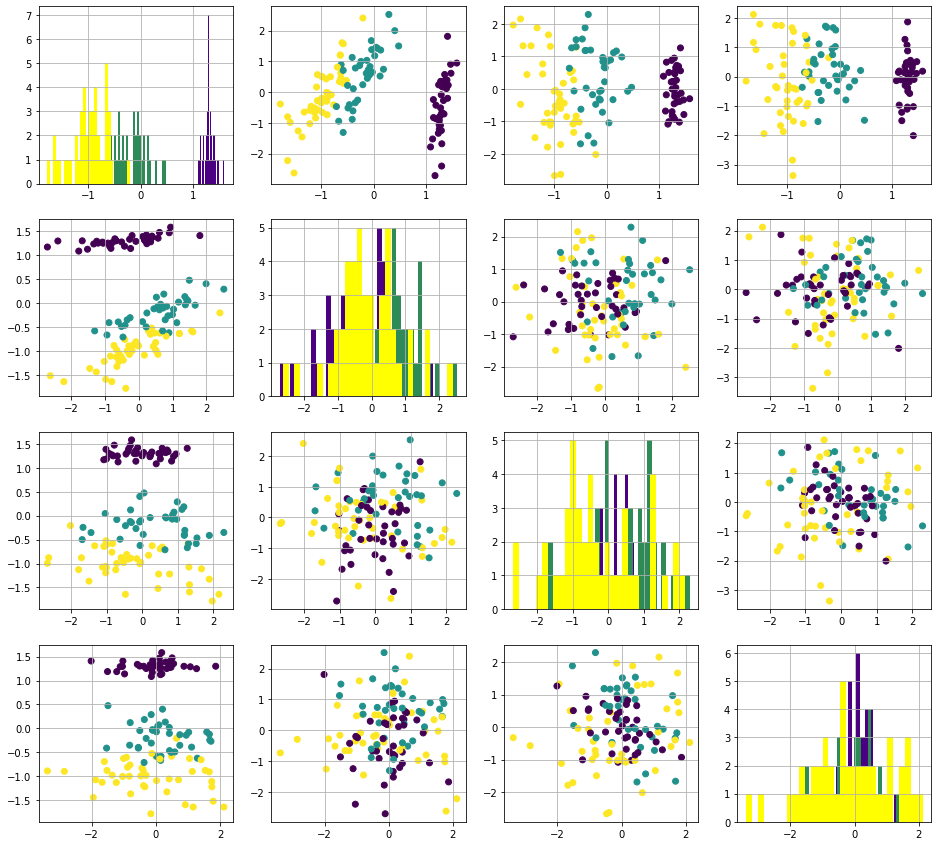

In [9]:
print(np.cov(X_whiten.T))
pair_plot(X_whiten, y)

## ZCA Whitening

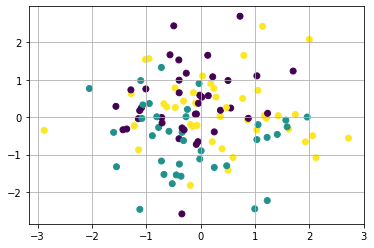

In [10]:
whitening = WhiteningScaler(apply_zca=True)
X_zca = whitening.fit_transform(X)

plt.figure()
plt.scatter(X_zca[:,0], X_zca[:,1], c=y)
plt.grid()
plt.show()

[[ 1.00000000e+00  1.93180319e-15 -9.97501260e-16  7.63305984e-16]
 [ 1.93180319e-15  1.00000000e+00  1.15669986e-16 -5.65227649e-18]
 [-9.97501260e-16  1.15669986e-16  1.00000000e+00 -3.03812278e-16]
 [ 7.63305984e-16 -5.65227649e-18 -3.03812278e-16  1.00000000e+00]]


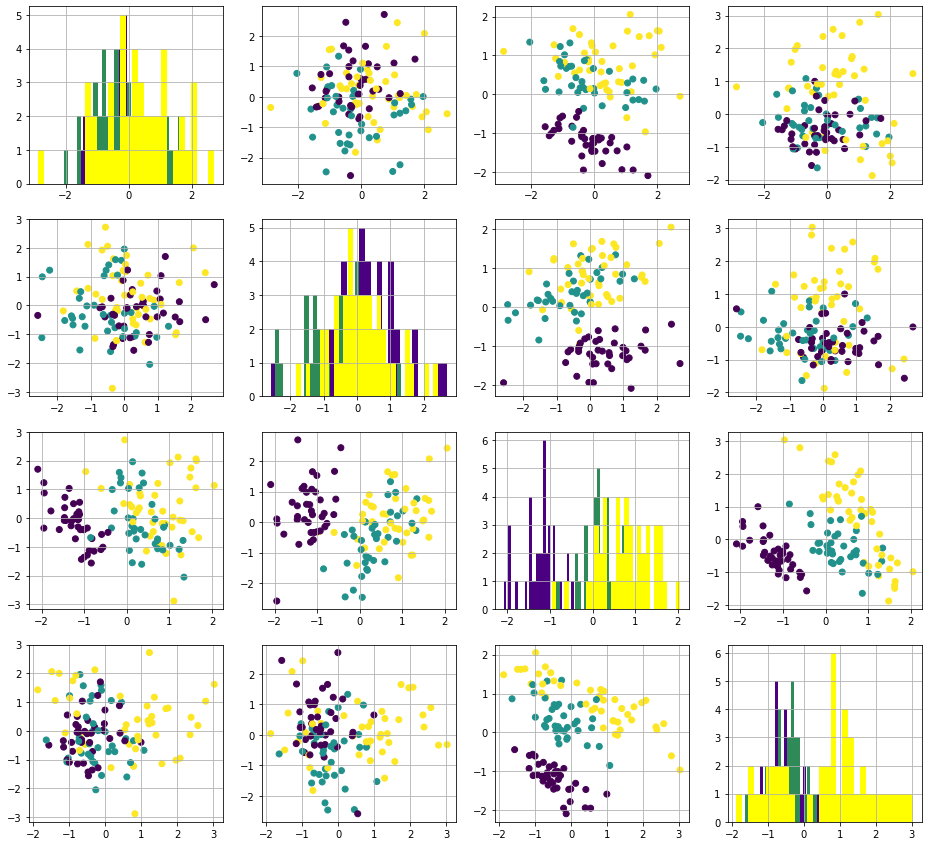

In [11]:
print(np.cov(X_zca.T))
pair_plot(X_zca, y)

## Transform & Inverse transform

In [12]:
X_test_zca = whitening.transform(X_test)
X_pull_backed = whitening.inverse_transform(X_test_zca)

np.all(np.isclose(X_test, X_pull_backed))

True

## Using ZCA whitening as an image preprocessor

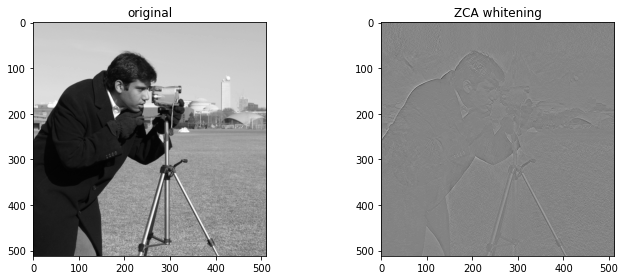

In [13]:
from skimage import data

camera = data.camera()

whitening = WhiteningScaler(thresholding='normalize', apply_zca=True)
camera_zca = whitening.fit_transform(camera)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(camera, 'gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(camera_zca, 'gray')
plt.title('ZCA whitening')

plt.tight_layout()

## Comparing pixel value distribution

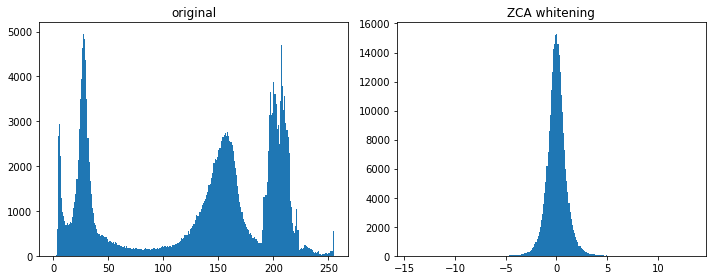

In [14]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(camera.flatten(), bins=255)
plt.title('original')
plt.subplot(1, 2, 2)
plt.hist(camera_zca.flatten(), bins=255)
plt.title('ZCA whitening')

plt.tight_layout()